In [1]:
#connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import numpy as np
import itertools

In [3]:
pip install tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67 kB 1.6 MB/s 
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7873 sha256=2750e191cf2bd9c3973f08940939a78575dbf556b1285a297bddb02add7c1751
  Stored in directory: /root/.cache/pip/wheels/64/46/53/3a413f321c09b0df8d4a26edd5fc3501c6c1b238497d166638
Successfully built tree


In [4]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv',sep=',')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Missing values

In [5]:
print(df.shape)
print(df.isnull().sum())

(5110, 12)
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [6]:
#missing value check2
df_na = (df.isnull().sum()/len(df))*100
print(df_na)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [7]:
#Drop missing values
df=df.dropna()
df.shape

(4909, 12)

# Descriptive statistics

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

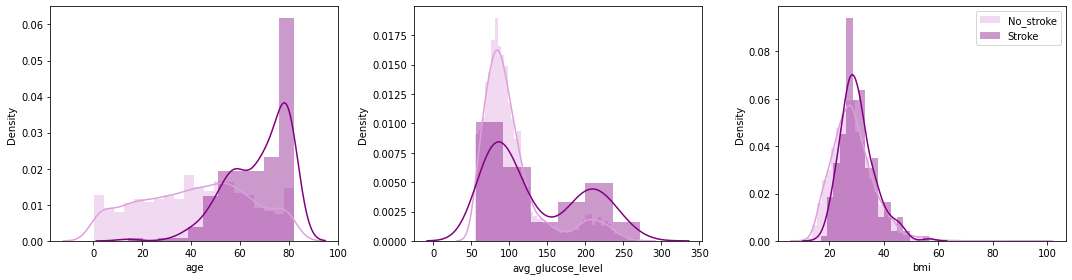

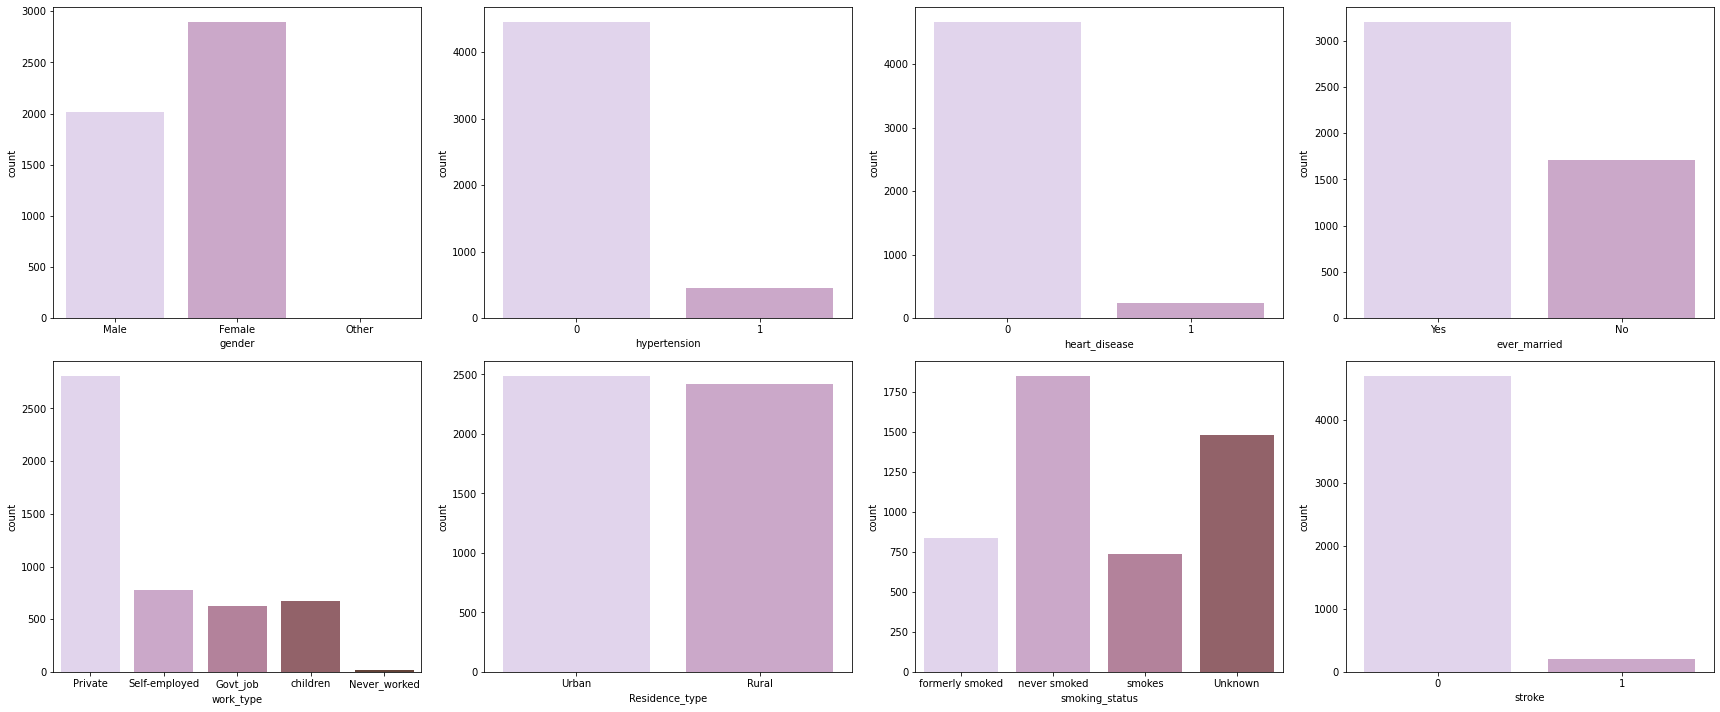

In [8]:
# generate num and cat variables
cat_data = [x for x in df.columns if 
            df[x].dtype == "object" or df[x].dtype =="int64"]
        
num_data = [y for y in df.columns if 
            df[y].dtype != "object" and df[y].dtype != "int64"]

# check the distribution of the numerical variables
f, axes = plt.subplots(1,len(num_data), figsize=(15,4), sharex=False)
for i in range(len(num_data)):
    sns.distplot(df[df['stroke']==0][num_data[i]], ax=axes[i], kde=True,
                 color = "plum", label='No_stroke')
    sns.distplot(df[df['stroke']==1][num_data[i]], ax=axes[i], kde=True,
                 color = "purple", label='Stroke')  
plt.tight_layout()
plt.legend()
plt.show()

# check the distributionhui of categorical variables
f, ax = plt.subplots(2,4,figsize=(24,10), sharey=False)
for i in range(1,len(cat_data)):
    sns.countplot(x=cat_data[i], data=df, ax=ax[(i-1)//4][(i-1)%4], 
                  palette=sns.cubehelix_palette(6, start=1.5, rot=-.5))
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


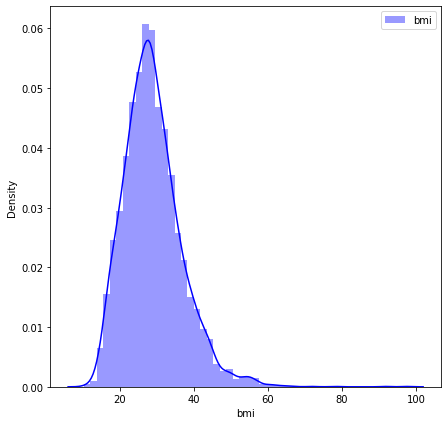

In [9]:
fig = plt.figure(figsize=(7,7))
sns.distplot(df.bmi,color='blue',label='bmi',kde=True)
plt.legend()
plt.show()

In [10]:
mean=df['bmi'].mean()
std=df['bmi'].std()
#df['bmi'][df['bmi'].isnull()]=np.random.randn(201)*std+mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


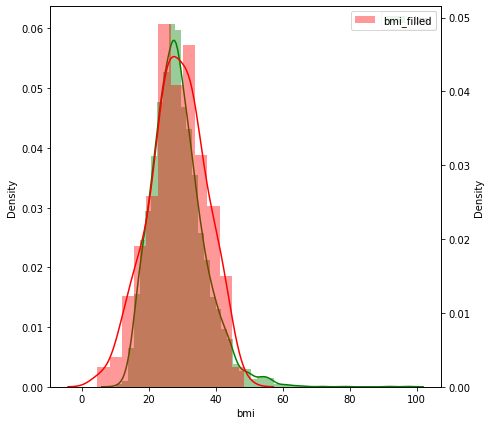

In [11]:
fig,ax = plt.subplots(figsize=(7,7))
sns.distplot(df.bmi,color='green',label='bmi',kde=True,ax=ax)
plt.legend()
ax2=plt.twinx()
sns.distplot(np.random.randn(201)*std+mean,color='red',label='bmi_filled',kde=True,ax=ax2)
plt.legend()
plt.show()

In [12]:
df.drop("id",1).describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

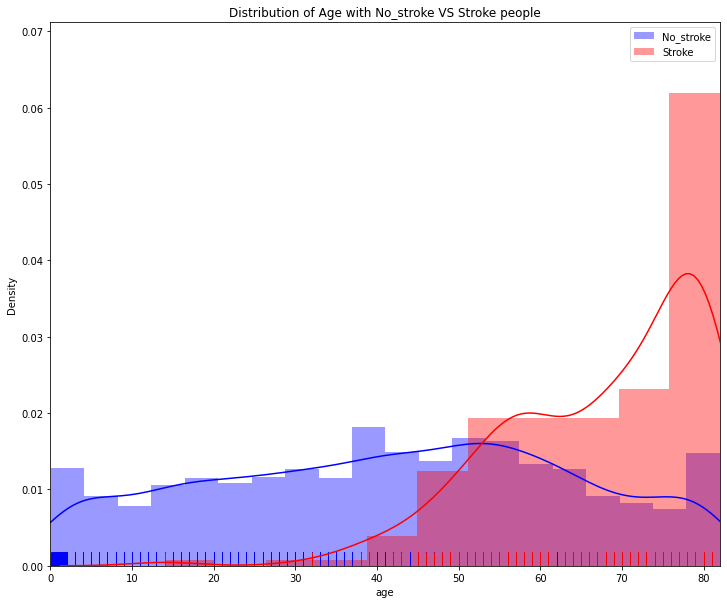

In [13]:
plt.figure(figsize=(12,10))
sns.color_palette('colorblind')
sns.distplot(df[df['stroke']==0].age,color='blue',kde=True,rug=True,label='No_stroke')
sns.distplot(df[df['stroke']==1].age,color='red',kde=True,rug=True,label='Stroke')
plt.title("Distribution of Age with No_stroke VS Stroke people")
plt.xlim([0,82])
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


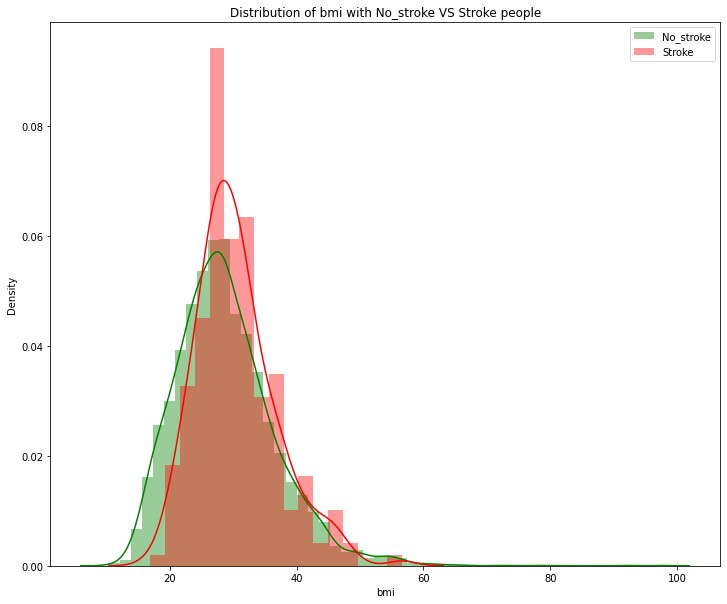

In [14]:
plt.figure(figsize=(12,10))
sns.distplot(df[df['stroke']==0].bmi,color='green',kde=True,label='No_stroke')
sns.distplot(df[df['stroke']==1].bmi,color='red',kde=True,label='Stroke')
plt.title("Distribution of bmi with No_stroke VS Stroke people")
plt.legend()
plt.show()

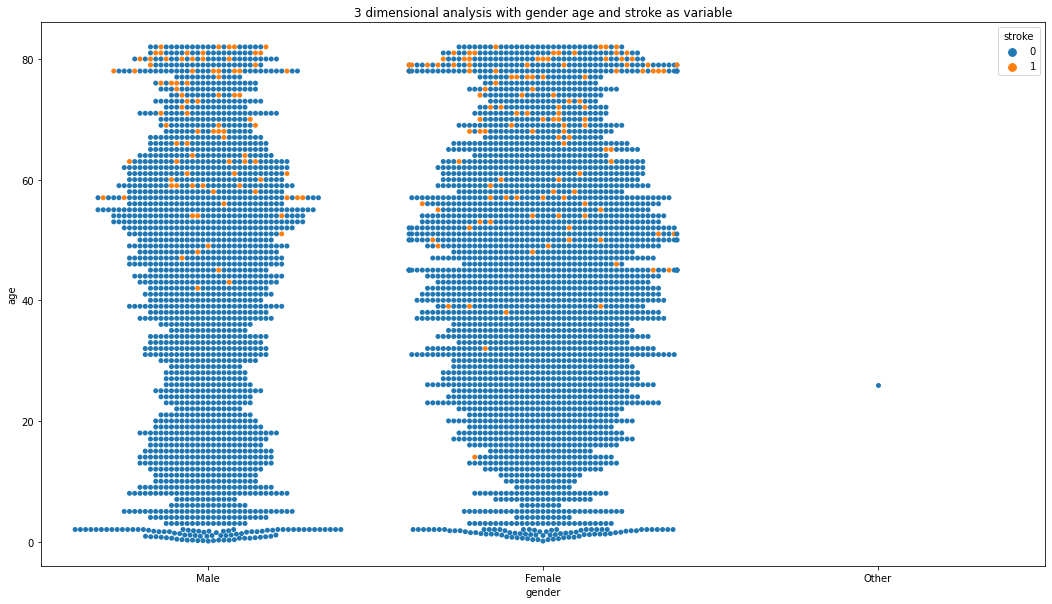

In [15]:
plt.figure(figsize=(18,10))
sns.swarmplot(x='gender', y="age",hue='stroke' ,data=df)
plt.title("3 dimensional analysis with gender age and stroke as variable")
plt.show()

### Encode data

In [16]:

categorical_features=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']
num_features=['age','avg_glucose_level','bmi']
def Cat_transform(df,features):
  from sklearn.preprocessing import OneHotEncoder
  trans=OneHotEncoder()
  X_cat=trans.fit_transform(df[features])
  return X_cat
def numerical_transform(df,features):
  from sklearn.preprocessing import StandardScaler
  trans=StandardScaler()
  X_num=trans.fit_transform(df[features])
  return X_num

X_cat=Cat_transform(df,categorical_features)
X_num=numerical_transform(df,num_features)
X=np.concatenate((X_cat.toarray(),X_num),axis=1)
Y=np.array(df['stroke']).reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=100)

In [17]:

print('Distribution_of_Stroke:',np.array(Y_train==1).sum())
print('Distribution_of_Not_Stroke',np.array(Y_train==0).sum())

Distribution_of_Stroke: 167
Distribution_of_Not_Stroke 3760


### SMOTE 

In [18]:
cat_features=np.arange(20)
from imblearn.over_sampling import SMOTENC #this SMOTE works better when we have categorical and continuous features both
sm=SMOTENC(random_state=100,categorical_features=cat_features)
X_train_ov,Y_train_ov=sm.fit_resample(X_train,Y_train)

In [19]:

print('Distribution_of_Stroke:',np.array(Y_train_ov==1).sum())
print('Distribution_of_Not_Stroke',np.array(Y_train_ov==0).sum())

Distribution_of_Stroke: 3760
Distribution_of_Not_Stroke 3760


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


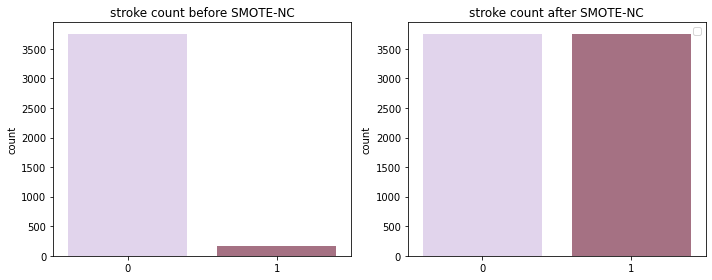

In [20]:
# plot smoke cound before and after smotenc
f, axes = plt.subplots(1,2, figsize=(10,4), sharex=False)
sns.countplot(np.concatenate(Y_train),ax=axes[0],
              palette=sns.cubehelix_palette(3, start=1.5, rot=-.5)).set(title='stroke count before SMOTE-NC')

sns.countplot(Y_train_ov,ax=axes[1],
              palette=sns.cubehelix_palette(3, start=1.5, rot=-.5)).set(title='stroke count after SMOTE-NC')

plt.tight_layout()
plt.legend()
plt.show()

# Build Model

In [21]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, make_scorer, recall_score
from sklearn.model_selection import cross_val_score
from numpy.ma.core import sqrt
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## Performance metrics

In [22]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    
    #Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
    #Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    #Classification Accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    
    #Classification Error
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
    
    #False Positive Rate
    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #sensitivity(Recall)
    sensitivity = TP/float(FN + TP)
    print('Sensitivity : ', sensitivity )
    
    #specificity
    specificity = TN/float(TN + TP)
    print('Specificity : ', specificity)

    #F1 score
    print('F1 score:', metrics.f1_score(y_test, y_pred_class))
    
    #Precision/ PPV
    print('Precision(PPV):', metrics.precision_score(y_test, y_pred_class))

    # AUC/ROC
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    y_pred_prob = y_pred_prob.reshape(-1,1) # reshape into col vector
    
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()
        
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.05])
        plt.ylim([0.0, 1.05])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    return accuracy 

In [23]:
# f_b score
def f_b(est, X, y_true, sample_weight= None):
  y_pred = est.predict(X)
  recall = recall_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  f_b = (1+1.5**2)*(recall*precision)/(recall+1.5**2*precision)
  return f_b

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Fitting 10 folds for each of 162 candidates, totalling 1620 fits
{'bootstrap': True, 'max_depth': 1000, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
RandomForestClassifier(max_depth=1000, max_features=5, n_estimators=500)


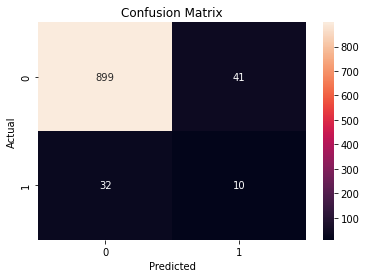

Classification Accuracy: 0.9256619144602851
Classification Error: 0.07433808553971488
False Positive Rate: 0.043617021276595745
Sensitivity :  0.23809523809523808
Specificity :  0.988998899889989
F1 score: 0.2150537634408602
Precision(PPV): 0.19607843137254902


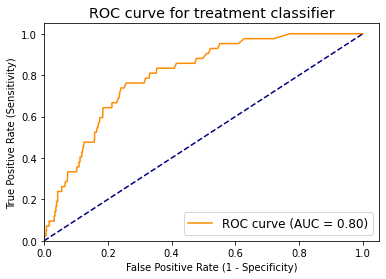

0.9256619144602851

In [ ]:
# Create the parameter grid based on the results of Grid search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [100, 500, 1000],
    'max_features': [3, 5, 10],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [100, 200, 500]
}

# Create a based model RF
rf = RandomForestClassifier()

# Instantiate the grid search model using 10-fold CV
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           scoring= "roc_auc",
                           refit = "roc_auc",
                           cv = 10, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train_ov, Y_train_ov)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

# make class predictions for the testing set
y_pred_class1 = grid_search.best_estimator_.predict(X_test)

accuracy_score1 = evalClassModel(grid_search.best_estimator_, Y_test, y_pred_class1, True)
accuracy_score1

## SVM

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.856 total time=  12.5s
[CV 2/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.763 total time=   6.6s
[CV 3/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.614 total time=   4.2s
[CV 4/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.735 total time=   4.2s
[CV 5/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.764 total time=   4.3s
[CV 6/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.734 total time=   4.2s
[CV 7/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.793 total time=   4.2s
[CV 8/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.781 total time=   4.2s
[CV 9/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.752 total time=   4.2s
[CV 10/10] END C=0.1, gamma=1, kernel=rbf, probability=True;, score=0.821 total time=   5.6s
[CV 1/10] END C=

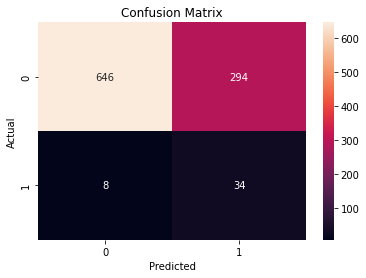

Classification Accuracy: 0.6924643584521385
Classification Error: 0.3075356415478615
False Positive Rate: 0.3127659574468085
Sensitivity :  0.8095238095238095
Specificity :  0.95
F1 score: 0.18378378378378377
Precision(PPV): 0.10365853658536585


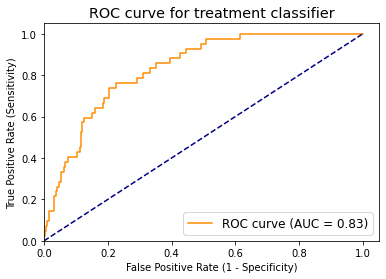

0.6924643584521385

In [24]:
# directly use SVM on testset without oversampling
from sklearn import svm
# Create the parameter grid based on the results of grid search 
param_grid = {
    'kernel': ['rbf','sigmoid','poly'],
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'probability':[True]
}
# Create a based model
svm = svm.SVC(class_weight = "balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = svm, param_grid = param_grid,
                           scoring= "roc_auc",
                           refit = "roc_auc", 
                           cv = 10, verbose = 3)


# Fit the grid search to the data
grid_search.fit(X_train, Y_train.ravel())
print(grid_search.best_params_)
print(grid_search.best_estimator_)

# make class predictions for the testing set
y_pred_class2 = grid_search.best_estimator_.predict(X_test)
accuracy_score2 = evalClassModel(grid_search.best_estimator_, Y_test, y_pred_class2, True)
accuracy_score2

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

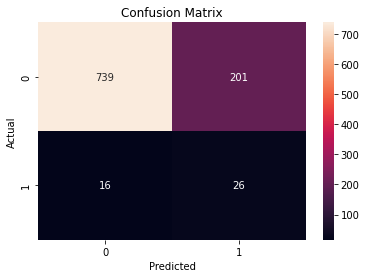

Classification Accuracy: 0.7790224032586558
Classification Error: 0.2209775967413442
False Positive Rate: 0.21382978723404256
Sensitivity :  0.6190476190476191
Specificity :  0.9660130718954248
F1 score: 0.19330855018587362
Precision(PPV): 0.1145374449339207


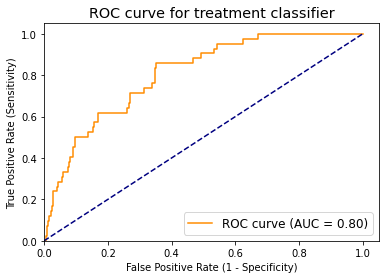

0.7790224032586558

In [ ]:
#Using Logistic Regression Algorithm to the Training Set

lr = LogisticRegression(random_state = 0, penalty = "none",  max_iter=5000)
lr.fit(X_train_ov,Y_train_ov)
Y_lr_pred = lr.predict(X_test)
evalClassModel(lr, Y_test, Y_lr_pred, True)

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# Create the parameter grid based for grid search 
param_grid = {
    'hidden_layer_sizes': [x for x in itertools.product(range(23,100,5),)] + [x for x in itertools.product(range(23,100,5), range(23,51,5))], # depth = 2
    'alpha': (10.0 ** -np.arange(1, 7)).tolist(),
    'activation': ["relu","logistic"],
    'solver': ["lbfgs", "adam"],
}

# Create a based model
mlp = MLPClassifier(max_iter = 500)
grid_search = RandomizedSearchCV(estimator = mlp, param_distributions = param_grid, 
                           scoring= "roc_auc",
                           refit = "roc_auc",
                           return_train_score = False,
                           n_iter = 50,
                           random_state=0, n_jobs=-1, cv = 10, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train_ov, Y_train_ov)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

# make class predictions for the testing set
y_pred_mlp = grid_search.best_estimator_.predict(X_test)
evalClassModel(grid_search.best_estimator_, Y_test, y_pred_mlp, True)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
pd.DataFrame(grid_search.cv_results_)

## GB

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Fitting 10 folds for each of 80 candidates, totalling 800 fits
{'learning_rate': 0.01, 'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 500}
GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=500)


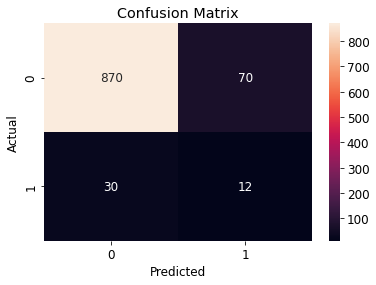

Classification Accuracy: 0.8981670061099797
Classification Error: 0.10183299389002032
False Positive Rate: 0.07446808510638298
Sensitivity :  0.2857142857142857
Specificity :  0.9863945578231292
F1 score: 0.1935483870967742
Precision(PPV): 0.14634146341463414


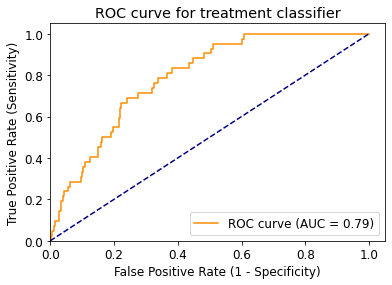

0.8981670061099797

In [ ]:
gbm_params = {"learning_rate" : [0.001, 0.01],
             "n_estimators": [100,500],
             "max_depth": [3,5,7,9],
             "min_samples_split": [2,4,6,8,10]}
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, 
                      scoring= "roc_auc",
                      refit = "roc_auc",cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
gbm_cv.fit(X_train_ov, Y_train_ov)
print(gbm_cv.best_params_)
print(gbm_cv.best_estimator_)

# make class predictions for the testing set
y_pred = gbm_cv.best_estimator_.predict(X_test)
evalClassModel(gbm_cv.best_estimator_, Y_test, y_pred, True)


## XGB

In [ ]:
from xgboost import XGBClassifier

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3}
XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=7,
              min_child_weight=3)


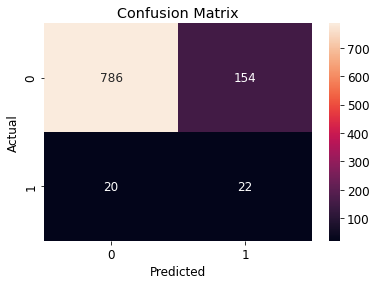

Classification Accuracy: 0.8228105906313645
Classification Error: 0.17718940936863548
False Positive Rate: 0.16382978723404254
Sensitivity :  0.5238095238095238
Specificity :  0.9727722772277227
F1 score: 0.2018348623853211
Precision(PPV): 0.125


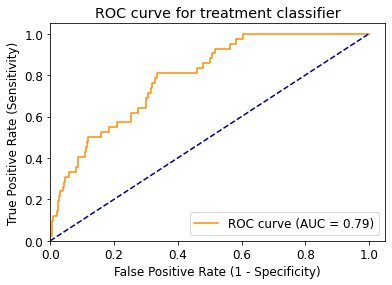

0.8228105906313645

In [ ]:
xgbm_params = { 
               'gamma': [0.1,0.2], 
               'max_depth': [1,5,7], 
               'colsample_bytree': [0.7,0.9], 
               'min_child_weight': [3, 5],
               "learning_rate" : [0.001, 0.01]
              }

xgbm = XGBClassifier()

xgbm_cv = GridSearchCV(xgbm, xgbm_params,
                       scoring= "roc_auc",
                       refit = "roc_auc",
                       cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
xgbm_cv.fit(X_train_ov, Y_train_ov)
print(xgbm_cv.best_params_)
print(xgbm_cv.best_estimator_)

# make class predictions for the testing set
y_pred = xgbm_cv.best_estimator_.predict(X_test)
evalClassModel(xgbm_cv.best_estimator_, Y_test, y_pred, True)

## ADA

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'learning_rate': 0.001, 'n_estimators': 50}
AdaBoostClassifier(learning_rate=0.001)


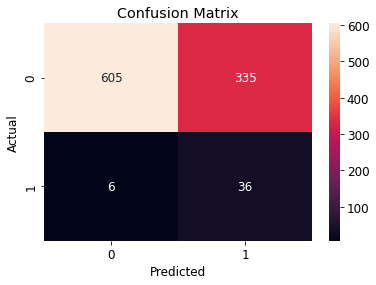

Classification Accuracy: 0.6527494908350305
Classification Error: 0.34725050916496947
False Positive Rate: 0.35638297872340424
Sensitivity :  0.8571428571428571
Specificity :  0.9438377535101404
F1 score: 0.17433414043583534
Precision(PPV): 0.09703504043126684


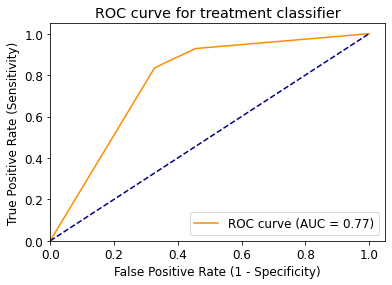

0.6527494908350305

In [ ]:
adabm_params = {  
               'n_estimators':[50,100,200],
               'learning_rate' :[0.001, 0.01,0.1]
              }

adabm = AdaBoostClassifier()
adabm_cv = GridSearchCV(adabm, adabm_params,
                       scoring= "recall",
                       refit = "recall",
                       cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
adabm_cv.fit(X_train_ov, Y_train_ov)
print(adabm_cv.best_params_)
print(adabm_cv.best_estimator_)

# make class predictions for the testing set
y_pred = adabm_cv.best_estimator_.predict(X_test)
evalClassModel(adabm_cv.best_estimator_, Y_test, y_pred, True)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Fitting 10 folds for each of 99 candidates, totalling 990 fits
{'n_neighbors': 31}
KNeighborsClassifier(n_neighbors=31)


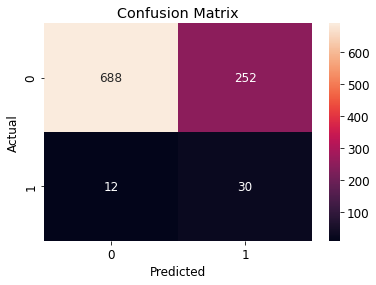

Classification Accuracy: 0.7311608961303462
Classification Error: 0.2688391038696538
False Positive Rate: 0.2680851063829787
Sensitivity :  0.7142857142857143
Specificity :  0.958217270194986
F1 score: 0.18518518518518517
Precision(PPV): 0.10638297872340426


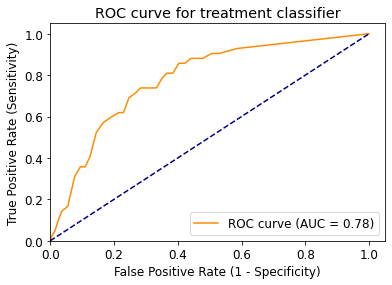

0.7311608961303462

In [ ]:
knn_params = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params,
                      scoring= "roc_auc",
                       refit = "roc_auc",
                       cv = 10, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
knn_cv.fit(X_train_ov, Y_train_ov)
print(knn_cv.best_params_)
print(knn_cv.best_estimator_)

# make class predictions for the testing set
y_pred = knn_cv.best_estimator_.predict(X_test)
evalClassModel(knn_cv.best_estimator_, Y_test, y_pred, True)